In [576]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  Generate data

In [652]:
from sklearn.datasets import make_regression

In [655]:
X_arr, y_arr = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

## Load into DataFrame

In [656]:
X_df = pd.DataFrame(data=X_arr, columns=['X'])

In [657]:
y_df = pd.DataFrame(data=y_arr, columns=['y'])

In [658]:
df = pd.concat([X_df, y_df], axis=1)
X = df[["X"]].values
y = df[["y"]].values
df.head()

,X,y
0,0.931280,50.779929
1,0.087047,-10.065270
2,-1.057711,-34.918392
3,0.314247,10.526743
4,-0.479174,-17.738377


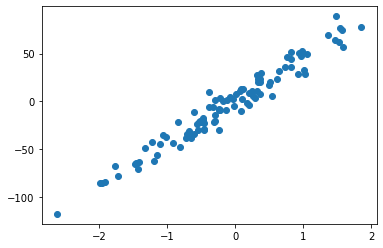

In [659]:
plt.scatter(X, y)
plt.show()

## Split Data

In [660]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [661]:
X_train.shape, y_train.shape

((80, 1), (80, 1))

In [662]:
X_test.shape, y_test.shape

((20, 1), (20, 1))

##  Implementing Gradient Descent

Formula:
### $ \theta := \theta - \alpha {\partial \over \partial \theta} J(\theta) $

### to implement gradient descent algorithm we need to follow 4 steps: 
1. Randomly initialize the bias and the weight theta
2. Calculate predicted value of y that is Y given the bias and the weight
3. Calculate the cost function from predicted and actual values of Y
4. Calculate gradient and the weights

firstly take a random value for bias and weights

In [663]:
import random

def initialize(input_dim, output_dim):
    b = np.random.rand(input_dim, output_dim).reshape((1,))
    theta = np.random.rand(input_dim, output_dim)
    return b, theta

b, theta = initialize(X_train.shape[1], y_train.shape[1])

print('''
        Bias: {}
        Weights: {}
      '''.format(b, theta))


        Bias: [0.36729878]
        Weights: [[0.51498986]]
      


###    Predicted y
#### $ \hat{y_i} = \theta*X + b $

In [664]:
def predict_y(b, theta, X):
    return b + np.dot(X, theta)

###  Cost Function (MSE)
#### $ J(\theta) := {1 \over m} \sum \limits _{i = 1}^{m} (y_i - \hat{y_i})^2 $

In [665]:
import math

# MSE 
def get_cost(y, y_hat):
    return (1/len(y)) * np.sum((y - y_hat)**2)

y_hat = predict_y(b, theta, X_train)

get_cost(y_train, y_hat)

1466.0797328876915

## Gradients
####  $ {\partial J \over \partial \theta} = -{2 \over m} \sum \limits _{i = 1}^{m} (y_i - \hat{y_i})X_i $
####  $ {\partial J \over \partial b} = -{2 \over m} \sum \limits _{i = 1}^{m} (y_i - \hat{y_i}) $

## Update Weights
#### $ \theta = \theta - \alpha{\partial J \over \partial \theta} $

#### $ b = b - \alpha{\partial J \over \partial b} $

In [666]:
def update_weights(X, y, y_pred, b_0, theta_0, learning_rate, m=X_train.shape[0]):
    dw = -(2/m) * np.sum((y - y_pred) * X)
    db = -(2/m) * np.sum((y - y_pred) * 1)
    b_1 = b_0 - learning_rate*db
    theta_1 = theta_0 - learning_rate*dw
    return b_1, theta_1

In [667]:
print("""
    After initialization 
        Bias: {}
        theta: {}
      """.format(b, theta))
print('Cost:', get_cost(y_train, y_hat))

b,theta = update_weights(X_train, y_train, y_hat, b, theta, 0.01)
y_hat = predict_y(b, theta, X_train)

print("""
    After first update 
        Bias: {}
        theta: {}
      """.format(b, theta))
print('Cost:', get_cost(y_train, y_hat))


    After initialization 
        Bias: [0.36729878]
        theta: [[0.51498986]]
      
Cost: 1466.0797328876915

    After first update 
        Bias: [0.37929682]
        theta: [[1.14719482]]
      
Cost: 1426.3853228862122


## GD Function

In [668]:
def run_gradient_descent(X, y, alpha, num_epochs):

    b, theta = initialize(X.shape[1], y.shape[1])

    for i in range(num_epochs):
        y_pred = predict_y(b, theta, X_train)

        cost = get_cost(y, y_pred)

        if (i%100) == 0:
            print (f"Epoch: {i}, loss: {cost:.3f}")

        b,theta = update_weights(X, y, y_pred, b, theta, alpha)
    
    return b[0], theta[0][0]

In [669]:
b, theta = run_gradient_descent(X_train, y_train, 0.01, 1000)

Epoch: 0, loss: 1449.169
Epoch: 100, loss: 154.690
Epoch: 200, loss: 83.800
Epoch: 300, loss: 79.917
Epoch: 400, loss: 79.704
Epoch: 500, loss: 79.692
Epoch: 600, loss: 79.692
Epoch: 700, loss: 79.692
Epoch: 800, loss: 79.692
Epoch: 900, loss: 79.692


In [670]:
b, theta

(0.8452877496983456, 44.364714350908585)

In [671]:
pred_test = predict_y(b_new, theta_new, X_test)
pred_test[: 10]

array([[ -68.87941207],
       [-123.88440676],
       [ -54.01192548],
       [   5.10925925],
       [  75.17828014],
       [ -66.44315459],
       [ -81.31505405],
       [ -33.50098427],
       [  -0.96039054],
       [ -90.27596328]])

In [672]:
y_test[: 10]

array([[ -64.51014139],
       [-118.02745409],
       [ -56.06201681],
       [  12.61693126],
       [  74.71530364],
       [ -63.16609268],
       [ -78.59179131],
       [ -38.90221305],
       [   2.74944415],
       [ -84.18851543]])

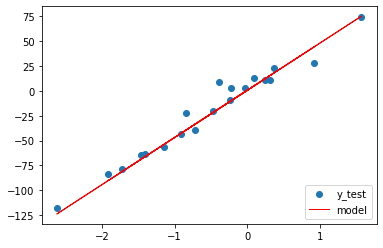

In [673]:
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

plt.show()

In [674]:
from sklearn.metrics import r2_score

score = r2_score(y_test, pred_test)
print(f'{score*100:.2f}%')

95.90%
